# __Artificial Neural Network__

- A supervised ML algo

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv('car_evaluation.csv')
df.head()

,buying,maint,doors,persons,lug_boot,safety,outcome
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [12]:
X = df.iloc[:,:-1]
y = df.outcome

In [5]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

X.buying = le.fit_transform(X.buying)
X.maint = le.fit_transform(X.maint)
X.lug_boot = le.fit_transform(X.lug_boot)
X.safety = le.fit_transform(X.safety)

X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,2,2,2,1
1,3,3,2,2,2,2
2,3,3,2,2,2,0
3,3,3,2,2,1,1
4,3,3,2,2,1,2


In [7]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: outcome, dtype: object

In [8]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

### Feature scaling

In [14]:
from sklearn.preprocessing import scale

X_scale = scale(X)

In [15]:
X_scale_df = pd.DataFrame(X_scale)
X_scale_df.head()

,0,1,2,3,4,5
0,1.341641,1.341641,-1.341641,-1.223178,1.224745,0.000000
1,1.341641,1.341641,-1.341641,-1.223178,1.224745,1.224745
2,1.341641,1.341641,-1.341641,-1.223178,1.224745,-1.224745
3,1.341641,1.341641,-1.341641,-1.223178,0.000000,0.000000
4,1.341641,1.341641,-1.341641,-1.223178,0.000000,1.224745


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=154)

In [53]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=(40,40,30),
    max_iter=300,
    learning_rate='adaptive',
    learning_rate_init=0.025
)

model.fit(X_train, y_train)

y_predict_test = model.predict(X_test)
y_predict_train = model.predict(X_train)

In [54]:
from sklearn.metrics import accuracy_score, classification_report

print('train: ', accuracy_score(y_train, y_predict_train))
print('test: ', accuracy_score(y_test, y_predict_test))

train:  1.0
test:  0.9855491329479769


In [55]:
pd.crosstab(y_test, y_predict_test)

col_0,acc,good,unacc,vgood
outcome,,,,
acc,76,0,1,1
good,1,12,0,1
unacc,1,0,235,0
vgood,0,0,0,18


<AxesSubplot:xlabel='col_0', ylabel='outcome'>

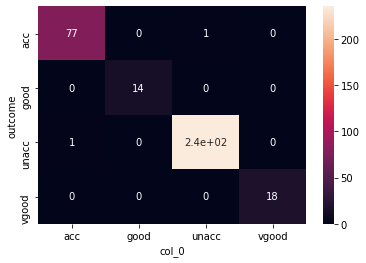

In [29]:
sns.heatmap(pd.crosstab(y_test, y_predict_test), annot=True)

In [56]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

         acc       0.97      0.97      0.97        78
        good       1.00      0.86      0.92        14
       unacc       1.00      1.00      1.00       236
       vgood       0.90      1.00      0.95        18

    accuracy                           0.99       346
   macro avg       0.97      0.96      0.96       346
weighted avg       0.99      0.99      0.99       346

